<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

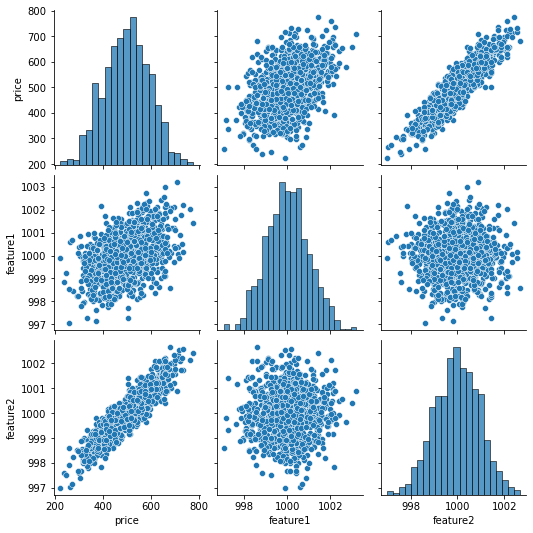

In [5]:
sns.pairplot(df)

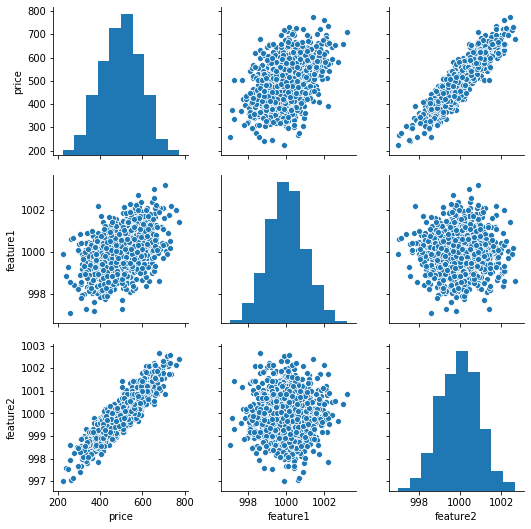

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [2]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.3.0
Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_internal\commands\uninstall.py", line 93, in run
    uninstall_pathset.commit()
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 450, in commit
    self._moved_paths.commit()
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 290, in commit
    save_dir.cleanup()
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_internal\utils\temp_dir.py", line 199, in cleanup
    rmtree(ensure_text(self._path))
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-packages\pip\_vendor\retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "C:\Users\Trogg\anaconda3\envs\tf\lib\site-pac

In [3]:
!pip install tensorflow

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0


In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [34]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

### Model - as a list of layers

In [35]:
# Practice

model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2),
])

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [ ]:
# Practice

model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

In [24]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [49]:
# Practice

model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [69]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [70]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 455us/step - loss: 256644.8906
Epoch 2/250
22/22 [==============================] - 0s 409us/step - loss: 256580.7500
Epoch 3/250
22/22 [==============================] - 0s 409us/step - loss: 256511.6562
Epoch 4/250
22/22 [==============================] - 0s 409us/step - loss: 256432.5938
Epoch 5/250
22/22 [==============================] - 0s 409us/step - loss: 256341.6719
Epoch 6/250
22/22 [==============================] - 0s 364us/step - loss: 256238.7500
Epoch 7/250
22/22 [==============================] - 0s 409us/step - loss: 256122.0312
Epoch 8/250
22/22 [==============================] - 0s 409us/step - loss: 255989.9844
Epoch 9/250
22/22 [==============================] - 0s 409us/step - loss: 255842.2656
Epoch 10/250
22/22 [==============================] - 0s 455us/step - loss: 255676.8906
Epoch 11/250
22/22 [==============================] - 0s 410us/step - loss: 255492.2500
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 455us/step - loss: 3296.4319
Epoch 95/250
22/22 [==============================] - 0s 409us/step - loss: 2257.1375
Epoch 96/250
22/22 [==============================] - 0s 410us/step - loss: 1698.4231
Epoch 97/250
22/22 [==============================] - 0s 455us/step - loss: 1499.3221
Epoch 98/250
22/22 [==============================] - 0s 455us/step - loss: 1448.4500
Epoch 99/250
22/22 [==============================] - 0s 409us/step - loss: 1418.2850
Epoch 100/250
22/22 [==============================] - 0s 455us/step - loss: 1395.7400
Epoch 101/250
22/22 [==============================] - 0s 409us/step - loss: 1365.5175
Epoch 102/250
22/22 [==============================] - 0s 455us/step - loss: 1344.6405
Epoch 103/250
22/22 [==============================] - 0s 409us/step - loss: 1316.7759
Epoch 104/250
22/22 [==============================] - 0s 455us/step - loss: 1293.9642
Epoch 105/250
22/22 [==============================] - 0s 455u

22/22 [==============================] - 0s 409us/step - loss: 43.5483
Epoch 190/250
22/22 [==============================] - 0s 409us/step - loss: 41.8219
Epoch 191/250
22/22 [==============================] - 0s 409us/step - loss: 39.5480
Epoch 192/250
22/22 [==============================] - 0s 409us/step - loss: 37.4759
Epoch 193/250
22/22 [==============================] - 0s 455us/step - loss: 35.1268
Epoch 194/250
22/22 [==============================] - 0s 455us/step - loss: 34.0192
Epoch 195/250
22/22 [==============================] - 0s 409us/step - loss: 32.2577
Epoch 196/250
22/22 [==============================] - 0s 410us/step - loss: 30.8896
Epoch 197/250
22/22 [==============================] - 0s 409us/step - loss: 29.9524
Epoch 198/250
22/22 [==============================] - 0s 409us/step - loss: 29.5404
Epoch 199/250
22/22 [==============================] - 0s 455us/step - loss: 28.8871
Epoch 200/250
22/22 [==============================] - 0s 364us/step - loss: 27

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [46]:
# model.history.history

# Practice
model.history.history

{'loss': [251267.5625,
  251245.84375,
  251224.25,
  251202.578125,
  251180.921875,
  251159.25,
  251137.71875,
  251115.953125,
  251094.328125,
  251072.640625,
  251051.046875,
  251029.421875,
  251007.765625,
  250986.125,
  250964.53125,
  250942.859375,
  250921.21875,
  250899.59375,
  250877.96875,
  250856.296875,
  250834.671875,
  250813.046875,
  250791.40625,
  250769.734375,
  250748.15625,
  250726.515625,
  250704.84375,
  250683.25,
  250661.546875,
  250640.0,
  250618.40625,
  250596.703125,
  250575.125,
  250553.46875,
  250531.8125,
  250510.265625,
  250488.609375,
  250467.0,
  250445.390625,
  250423.6875,
  250402.1875,
  250380.546875,
  250358.921875,
  250337.25,
  250315.65625,
  250294.15625,
  250272.5,
  250250.859375,
  250229.21875,
  250207.609375,
  250186.078125,
  250164.5,
  250142.875,
  250121.21875,
  250099.640625,
  250078.03125,
  250056.390625,
  250034.90625,
  250013.328125,
  249991.640625,
  249970.03125,
  249948.4375,
  249926.92

In [71]:
# loss = model.history.history['loss']
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

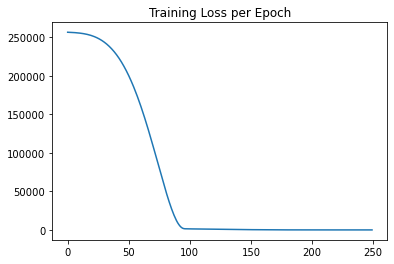

In [72]:
# Practice
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")

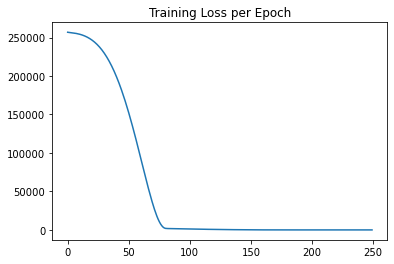

In [33]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [73]:
# model.metrics_names

model.metrics_names

['loss']

In [74]:
# training_score = model.evaluate(X_train,y_train,verbose=0)
# test_score = model.evaluate(X_test,y_test,verbose=0)

# Practice
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [75]:
# Practice
training_score

23.81983757019043

In [31]:
training_score

24.55682439531599

In [76]:
# Practice
test_score

24.97640609741211

In [32]:
test_score

26.798187001546225

### Further Evaluations

In [77]:
# test_predictions = model.predict(X_test)

# Practice
test_predictions = model.predict(X_test)

In [78]:
# Practice
test_predictions

array([[405.28195],
       [623.5994 ],
       [592.1708 ],
       [572.2954 ],
       [366.64523],
       [579.2327 ],
       [515.1259 ],
       [459.09763],
       [549.30646],
       [447.50238],
       [611.8408 ],
       [548.93463],
       [419.10013],
       [408.8745 ],
       [651.25995],
       [437.28793],
       [508.4366 ],
       [660.04425],
       [662.6734 ],
       [565.56024],
       [334.22284],
       [444.84146],
       [382.5301 ],
       [378.737  ],
       [566.641  ],
       [610.67365],
       [532.4298 ],
       [427.8551 ],
       [655.5429 ],
       [414.05768],
       [442.62158],
       [485.14496],
       [438.41348],
       [681.94855],
       [424.7248 ],
       [417.703  ],
       [501.89816],
       [550.509  ],
       [509.79562],
       [395.39252],
       [618.6393 ],
       [416.6103 ],
       [604.4949 ],
       [445.93088],
       [502.01254],
       [581.7106 ],
       [669.03656],
       [490.40295],
       [318.52274],
       [485.4493 ],


In [34]:
test_predictions

array([[406.26343],
       [625.07983],
       [593.59314],
       [573.62714],
       [367.47824],
       [580.6027 ],
       [516.3    ],
       [460.22568],
       [550.58673],
       [448.60873],
       [613.2959 ],
       [550.30396],
       [420.10864],
       [409.8501 ],
       [652.86633],
       [438.35947],
       [509.70355],
       [661.5566 ],
       [664.221  ],
       [566.93195],
       [335.011  ],
       [445.90964],
       [383.43677],
       [379.66046],
       [567.987  ],
       [612.09296],
       [533.69293],
       [428.89386],
       [657.0607 ],
       [415.08276],
       [443.71158],
       [486.30923],
       [439.4752 ],
       [683.53503],
       [425.78995],
       [418.6874 ],
       [503.1647 ],
       [551.8273 ],
       [510.96967],
       [396.29428],
       [620.1216 ],
       [417.63516],
       [605.9426 ],
       [447.04782],
       [503.214  ],
       [583.16064],
       [670.66925],
       [491.6024 ],
       [319.3331 ],
       [486.60828],


In [81]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df

Test True Y
0     402.296319
1     624.156198
2     582.455066
3     578.588606
4     371.224104
..           ...
295   525.704657
296   502.909473
297   612.727910
298   417.569725
299   410.538250

[300 rows x 1 columns]

In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

Test Y
0    402.296319
1    624.156198
2    582.455066
3    578.588606
4    371.224104
..          ...
295  525.704657
296  502.909473
297  612.727910
298  417.569725
299  410.538250

[300 rows x 1 columns]

In [82]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [83]:
test_predictions

0      405.281952
1      623.599426
2      592.170776
3      572.295410
4      366.645233
          ...    
295    529.097107
296    515.436829
297    609.701660
298    416.928101
299    410.888275
Length: 300, dtype: float32

In [84]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [87]:
pred_df.columns = ['Test True Y','Model Predictions']

In [88]:
pred_df

Test True Y  Model Predictions
0     402.296319         405.281952
1     624.156198         623.599426
2     582.455066         592.170776
3     578.588606         572.295410
4     371.224104         366.645233
..           ...                ...
295   525.704657         529.097107
296   502.909473         515.436829
297   612.727910         609.701660
298   417.569725         416.928101
299   410.538250         410.888275

[300 rows x 2 columns]

Let's compare to the real test labels!

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

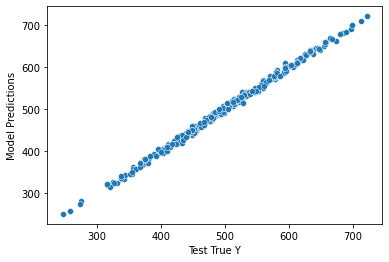

In [89]:
# Practice
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

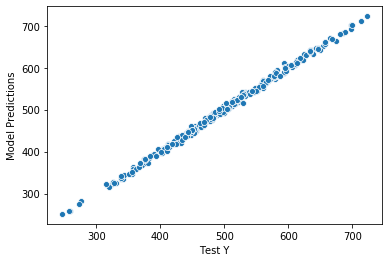

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

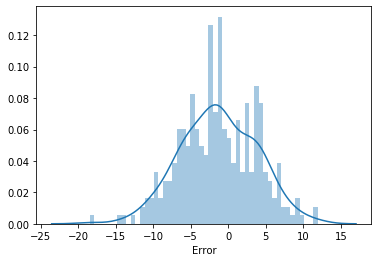

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [90]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error

# Practice
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
# mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

# Practice
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.002092736291135

My Notes: Take note of the mean, min and max of the price of the dataset when evaluating MAE. The model is **off by $4 in price**.

In [93]:
# mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

# Practice
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

24.976409948727305

In [94]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [95]:
# Essentially the same thing, difference just due to precision
test_score

24.97640609741211

In [96]:
#RMSE
test_score**0.5

4.997640052806135

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [105]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [106]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [107]:
new_gem = scaler.transform(new_gem)

In [108]:
model.predict(new_gem)

array([[419.7283]], dtype=float32)

## Saving and Loading a Model

In [98]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model

In [99]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

# Practice
model.save('my_model.h5') # creates a HDF5 file 'my_model.h5'

In [100]:
# later_model = load_model('my_model.h5')

# Practice
later_model = load_model('my_model.h5')

In [109]:
# later_model.predict(new_gem)

# Practice
later_model.predict(new_gem)

array([[419.7283]], dtype=float32)